# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
import matplotlib.pyplot as plt


# Combining CSV files in single file

In [2]:
import glob 
csv_files=glob.glob('*.{}'.format('csv'))
csv_files

['stock_data1 (1).csv', 'stock_data2.csv', 'stock_data3.csv']

In [9]:
df_append=pd.DataFrame()
for file in csv_files:
    df=pd.read_csv(file)
    df_append=df_append.append(df,ignore_index=True)
df_append

C:\Users\ekta\AppData\Local\Temp\ipykernel_16420\2893495819.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append=df_append.append(df,ignore_index=True)
C:\Users\ekta\AppData\Local\Temp\ipykernel_16420\2893495819.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append=df_append.append(df,ignore_index=True)
C:\Users\ekta\AppData\Local\Temp\ipykernel_16420\2893495819.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append=df_append.append(df,ignore_index=True)


,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2023-04-24 09:15:00+05:30,2372.399902,2380.850098,2366.899902,2378.000000,2378.000000,0.0
1,2023-04-24 09:20:00+05:30,2378.000000,2380.000000,2370.750000,2371.449951,2371.449951,303062.0
2,2023-04-24 09:25:00+05:30,2371.250000,2376.300049,2365.699951,2365.699951,2365.699951,203201.0
3,2023-04-24 09:30:00+05:30,2365.699951,2365.949951,2358.000000,2359.949951,2359.949951,310773.0
4,2023-04-24 09:35:00+05:30,2359.149902,2362.000000,2352.899902,2358.649902,2358.649902,220015.0
...,...,...,...,...,...,...,...
6070,2023-05-31 15:05:00+05:30,12.045000,12.230000,11.962500,11.987500,11.987500,NaN
6071,2023-05-31 15:10:00+05:30,11.967500,12.022500,11.935000,11.997500,11.997500,NaN
6072,2023-05-31 15:15:00+05:30,11.997500,12.000000,11.852500,11.865000,11.865000,NaN
6073,2023-05-31 15:20:00+05:30,11.862500,11.965000,11.817500,11.912500,11.912500,NaN


In [4]:
df_append.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,2.025000e+03
mean,6891.479495,6894.176509,6888.753265,6891.537882,6891.537882,5.923732e+04
std,8069.408591,8072.070548,8066.761266,8069.483380,8069.483380,7.798613e+04
min,10.840000,10.860000,8.182500,10.840000,10.840000,0.000000e+00
25%,12.881250,12.930000,12.826250,12.882500,12.882500,2.518600e+04
50%,2452.149902,2454.500000,2450.000000,2452.199951,2452.199951,4.127400e+04
75%,18118.474610,18127.024415,18111.650390,18118.799805,18118.799805,7.085200e+04
max,18653.150390,18661.800780,18650.599610,18652.199220,18652.199220,1.308899e+06


In [5]:
df_append.shape

(6075, 7)

# Setting Target variable and features

In [6]:
output_variable=pd.DataFrame(df['Close'])
features=['Open','High','Low']

# Normalizing Data(scaling)

In [7]:
scaler=MinMaxScaler()
feature_transform=scaler.fit_transform(df[features])
feature_transform=pd.DataFrame(columns=features,data=feature_transform,index=df.index)
feature_transform.head()

,Open,High,Low
0,0.275742,0.442709,0.628246
1,0.395288,0.425347,0.674715
2,0.408377,0.416667,0.688838
3,0.421466,0.415799,0.694761
4,0.415358,0.416667,0.692483


# Creating train test dataset for model

In [12]:
from sklearn.model_selection import TimeSeriesSplit
timesplit=TimeSeriesSplit(n_splits=10)
for train_index,test_index in timesplit.split(feature_transform):
    X_train,X_test=feature_transform[:len(train_index)],feature_transform[len(train_index):(len(train_index)+len(test_index))]
    Y_train,Y_test=output_variable[:len(train_index)].values.ravel(),output_variable[len(train_index):(len(train_index)+len(test_index))].values.ravel()


# Reshaping array

In [13]:
trainX=np.array(X_train)
testX=np.array(X_test)
X_train=trainX.reshape(X_train.shape[0],1,X_train.shape[1])
X_test=testX.reshape(X_test.shape[0],1,X_test.shape[1])

# Model Building

In [15]:
model=Sequential()

model.add(LSTM(32,return_sequences=False,input_shape=(1,trainX.shape[1]),activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,Y_train,epochs=100,batch_size=8,verbose=1,shuffle=False)


Epoch 1/100
231/231 [==============================] - 2s 2ms/step - loss: 130.4832
Epoch 2/100
231/231 [==============================] - 0s 2ms/step - loss: 38.4053
Epoch 3/100
231/231 [==============================] - 1s 2ms/step - loss: 7.0131
Epoch 4/100
231/231 [==============================] - 0s 2ms/step - loss: 5.7989
Epoch 5/100
231/231 [==============================] - 0s 2ms/step - loss: 5.1220
Epoch 6/100
231/231 [==============================] - 0s 2ms/step - loss: 4.4963
Epoch 7/100
231/231 [==============================] - 1s 2ms/step - loss: 3.8888
Epoch 8/100
231/231 [==============================] - 1s 3ms/step - loss: 3.3557
Epoch 9/100
231/231 [==============================] - 1s 2ms/step - loss: 2.8607
Epoch 10/100
231/231 [==============================] - 1s 3ms/step - loss: 2.4097
Epoch 11/100
231/231 [==============================] - 1s 3ms/step - loss: 2.0026
Epoch 12/100
231/231 [==============================] - 1s 2ms/step - loss: 1.6397
Epoch 13/1

# Model Prediction

In [17]:
y_pred=model.predict(X_test)

6/6 [==============================] - 0s 6ms/step


# Visualizing our prediction with actual values

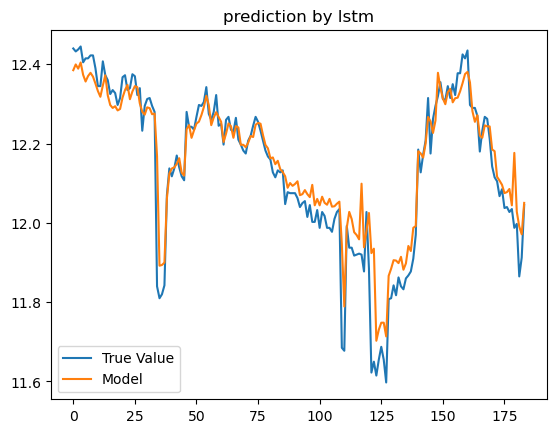

In [18]:
plt.plot(Y_test,label='True Value')
plt.plot(y_pred,label='Model')
plt.title('prediction by lstm')
plt.legend()
plt.show()

# RMSE value for accuracy

In [21]:
rmse=np.sqrt(np.mean(y_pred-Y_test)**2)
rmse

0.019487494659755567

In [ ]:
Here since RMSE score is close to 0 thus our model is predicting the values correctly